# Plotting a Perceptron

## Introduction

In the last lesson we saw how we could represent a basic perceptron.  Our perceptron receives various inputs and then based on these inputs either fires or does not fire.

<img src="./neuron-general-2.png" width="50%">

As we can see in the diagram above, the perceptron returns a 1 or 0 depending on whether the weighted the sum of these inputs plus the bias is greater than 0.  

In this lesson, let's work on translating our perceptron into the context of plotting some data and then using the perceptron as our hypothesis function to make a prediction.

### Plotting the perceptron

Below let's take a look at some data of different food that either have sugar or not, along with their scores for sweet taste and sweet smell.  

> Press shift enter to assign data to the proper variables.

In [68]:
import numpy as np
sugary_smell = [5.7, 2.1, 4.9, 2.7, 3.8, 5.8, 2.8, 1.8, 5.6, 8.3]
sugary_taste = [9.5, 8.4, 5.8, 0.3, 8.2, 7.3, 9.4, 3.9, 4.2, 5.7]
sugar_scores = [(2*taste + smell -18) for taste, smell in zip(sugary_taste, sugary_smell)]
pos_scores = np.array(sugar_scores) > 0

As we can see from the plot below, the more that the food tastes sweet and smells sweet, the more that there tends to be sugar.

> Press shift + return to plot the data below.

In [72]:
scatter_trace = go.Scatter(x=sugary_taste,  y=sugary_smell, mode = 'markers', marker=dict(color=1*pos_scores, colorscale='Viridis'), hovertext = 1*pos_scores)
layout = go.Layout(yaxis = dict(scaleanchor = "x",scaleratio = 1, range = [0, 10], title = 'smell score'),  xaxis = dict(title = 'taste score'), title = 'Is there sugar?')
sugar_data_fig = go.Figure(data = [scatter_trace], layout = layout)
sugar_data_fig.write_json('./sugar_data_fig.json')

Ok, now so far this is just a plot of our data.  Now let's plot the hypothesis function.

In [78]:
def decision_boundary_y(x, coefs, intercept): return (coefs[0]*x+intercept)/(-1*coefs[1])

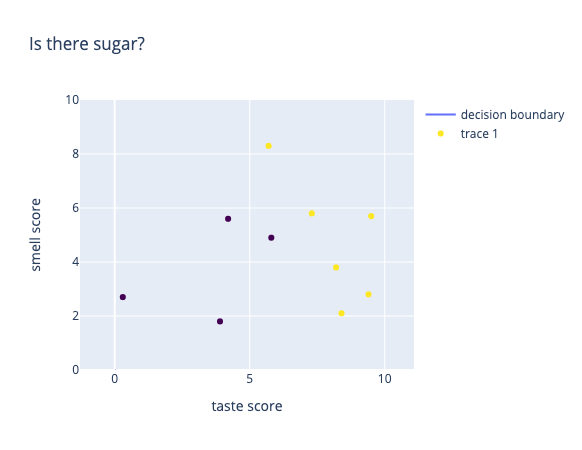

In [80]:
boundaries = [decision_boundary_y(val, [2, 1], 0) for val in range(0, 10, 1)]
decision_trace = go.Scatter(x=list(range(0, 10, 1)), y=boundaries, mode = 'lines', name='decision boundary')
sugar_fig = go.Figure(data = [decision_trace, scatter_trace], layout = layout)
sugar_fig

This straight line is the graphed version of our hypothesis function.  If the data is to the right of the line, the perceptron predicts it has sugar, and on the other side of the line the perceptron predicts not.

Take another look at the formula.

\begin{equation}
  f(x)=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ 2x_1 + 1x_2 - 18> 0 \\
    0, & \text{otherwise}
  \end{array}\right.
\end{equation} 

Now if you follow the blue line from the bottom of the plot to the top, you can see that the line contains the points `(9, 0)`, `(8, 2)`, `(7, 4)`.  These are all points where $2*x_1 + x_2 - 18 = 0$.  For example, for the first point:
* $2*9 + 1*0 - 18 = 0$

### Practice with Perceptrons

Now let's use a perceptron to make predictions with our breast cancer cell dataset.

In [13]:
import pandas as pd
df = pd.read_csv('./cell_data.csv')

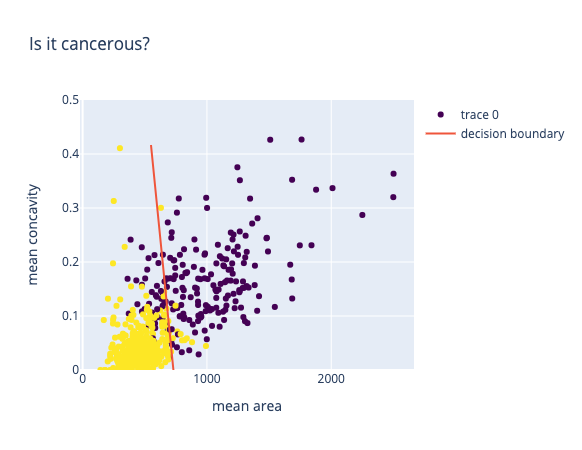

In [27]:
import plotly.graph_objects as go

values = list(range(550, 800, 50))
boundaries = [0.41661, 0.3011275, 0.18563, 0.0701, -0.045341]
decision_trace = go.Scatter(x=values, y=boundaries, mode = 'lines', name='decision boundary')
layout = go.Layout(xaxis = {'title': 'mean area'}, yaxis = {'title': 'mean concavity', 'range': [0, .5]}, title = 'Is it cancerous?')
scatter_data = go.Scatter(x=df['mean_area'], y=df['mean_concavity'],  marker=dict(color=df['is_cancerous'], colorscale='Viridis'), 
                     mode='markers', hovertext=df['is_cancerous'])
fig = go.Figure(data = [scatter_data, decision_trace], layout = layout)
fig

The line above represents the hypothesis function of the perceptron.  And the line above repesents the following hypothesis function of the perceptron:

\begin{equation}
  f(x)=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ -.0080233*x_1 + -3.47361781*x_2 + 5.86 > 0 \\
    0, & \text{otherwise}
  \end{array}\right.
\end{equation} 

In [19]:
def perceptron(x_1, x_2):
    summation = -0.00802333*x_1 +  -3.47361781*x_2 + 5.86
    if summation > 0:
        return 1
    else:
        return 0

> Press `shift + return` on the cell above to declare your function. The answer for this is below.

In [20]:
x_1 = 951.6
x_2 = .1036
perceptron(x_1, x_2)
# 0

0

In [22]:
x_1 = 435.6
x_2 = .059
perceptron(x_1, x_2)
# 1

1

### Summary

In this lesson, we saw how we can plot the decision boundary of a perceptron.  The decision boundary is the line the divides predictions in one class versus the other.  It corresponds to where our `summation`, or linear component, is exactly zero. And then we predict an observation depending on if it lines on one side of the decision boundary or the other -- that is if the summation is greater or less than zero.

### Answers

In [ ]:
def perceptron(x_1, x_2):
    summation = -0.00802333*x_1 +  -3.47361781*x_2 + 5.86
    if summation > 0:
        return 1
    else:
        return 0

In [61]:
fig.write_json('./fig_data.json')

In [62]:
with open('fig_data.json') as json_file:
    data = json.load(json_file)

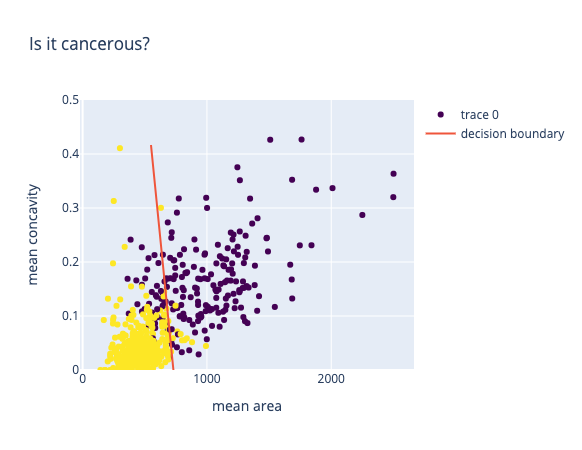

In [64]:
go.Figure(data)